In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip

In [2]:
#loading the data from the given file
image_size = 28
num_images = 55000
f = gzip.open('train-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_images)

data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

data = data.reshape(num_images, image_size, image_size, 1)

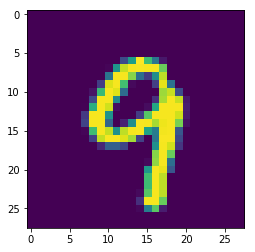

In [3]:
#pritning the images
image = np.asarray(data[550]).squeeze()

plt.imshow(image)
plt.show()

In [4]:
#storing the data in the form of matrix
X=np.asarray(data[:])
X=X.squeeze()
X=X.reshape(X.shape[0],X.shape[2]*X.shape[1])
X=X.T/255
X.shape

(784, 55000)

In [5]:
#knowing the no of features and the no of data points in the given array
m=X.shape[1]
n=X.shape[0]
print(m)
print(n)

55000
784


In [6]:
#loading the labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
Y = np.zeros((1,m))
for i in range(0,54999):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    Y[0,i]=labels
print(Y[0,550]) 
print(Y.shape)

9.0
(1, 55000)


In [7]:
Y1= np.zeros((10,m))
for i in range (0,m):
    for j in range(0,10):
        if(j==int(Y[0,i])):
            Y1[j,i]=1
        else:
            Y1[j,i]=0
Y=Y1            

df = pd.read_csv('Downloads/mnist_train.csv',header = None)
data = np.array(df)
X = (data[:,1:].transpose())/255
m = X.shape[1]
n = X.shape[0]
Y_orig = data[:,0:1].transpose()
Y = np.zeros((10,m))
for i in range(m): 
    Y[int(Y_orig[0,i]),i] = 1

In [8]:
def relu(Z):
    result = (Z + np.abs(Z))/2
    return result

In [9]:
def relu_backward(Z):
    result = (Z + np.abs(Z))/(2*np.abs(Z))
    return result

In [10]:
def softmax(Z):
    temp = np.exp(Z)
    result = temp/np.sum(temp,axis = 0,keepdims = True)
    return result

In [11]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims) - 1
    for l in range(1,L + 1):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))
        #print(parameters)
    return parameters

In [12]:
def forward_prop(X,parameters):
    cache = {}
    
    L = len(layer_dims) - 1
    A_prev = X
    for l in range(1,L):
        Z = parameters["W" + str(l)].dot(A_prev) + parameters["b" + str(l)]
        A = relu(Z)
        cache["Z" + str(l)] = Z
        A_prev = A
    Z = parameters["W" + str(L)].dot(A_prev) + parameters["b" + str(L)]
    AL = softmax(Z)
    cache["Z" + str(L)] = Z
    return AL,cache

In [13]:
def compute_cost(AL,Y):
    m = AL.shape[1]
    cost = (np.sum(-(Y * np.log(AL))))/(m)
    return cost

In [14]:
def backward_prop(X,Y,cache,parameters,AL,layer_dims):
    m = X.shape[1]
    dparameters = {}
    L = len(layer_dims) - 1
    dZ = AL - Y
    dparameters["dW" + str(L)] = dZ.dot(relu(cache["Z" + str(L-1)]).transpose())/m
    #dparameters["dW" + str(L)] = dZ.dot(X.transpose())/m
    dparameters["db" + str(L)] = np.sum(dZ,axis = 1,keepdims = True)/m
    for l in range(1,L):
        dZ = ((parameters["W" + str(L-l+1)].transpose()).dot(dZ)) * (relu_backward(cache["Z" + str(L-l)]))
        if L-l-1 != 0:
            dparameters["dW" + str(L-l)] = dZ.dot(relu(cache["Z" + str(L-1-l)]).transpose())/m
        else:
            dparameters["dW" + str(L-l)] = dZ.dot(X.transpose())/m
        dparameters["db" + str(L-l)] = np.sum(dZ,axis = 1,keepdims = True)/m
    return dparameters  

In [15]:
def update_parameters(parameters,dparameters,layer_dims,learning_rate):
    L = len(layer_dims) - 1
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*dparameters["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*dparameters["db" + str(l)]
    return parameters

In [16]:
def model(X,Y,layer_dims,learning_rate,num_iters):
    costs = []
    parameters = initialize_parameters(layer_dims)
    for i in range(num_iters):
        AL,cache = forward_prop(X,parameters)
        cost = compute_cost(AL,Y)
        costs.append(cost)
        dparameters = backward_prop(X,Y,cache,parameters,AL,layer_dims)
        parameters = update_parameters(parameters,dparameters,layer_dims,learning_rate)
        print(i,"\t",cost)
    return parameters,costs

In [19]:
#trainig
layer_dims = [784,120,10]
parameters,costs = model(X,Y,layer_dims,0.5,2000)

0 	 2.3032718522
1 	 2.29865899442
2 	 2.2938337029
3 	 2.28767836322
4 	 2.27912976402
5 	 2.26699519023
6 	 2.24977560538
7 	 2.22544551059
8 	 2.19143784975
9 	 2.14483139181
10 	 2.08282640261
11 	 2.00345765165
12 	 1.90640314372
13 	 1.79363611749
14 	 1.669845734
15 	 1.54206933712
16 	 1.41812718626
17 	 1.3042916204
18 	 1.20366794148
19 	 1.11645876565
20 	 1.04129593978
21 	 0.976403522064
22 	 0.920142392014
23 	 0.871140778447
24 	 0.828275458354
25 	 0.790660949894
26 	 0.757709974509
27 	 0.729780049365
28 	 0.711410854858
29 	 0.732917289783
30 	 0.90248402669
31 	 1.44940347996
32 	 1.36081586232
33 	 0.996636211535
34 	 0.77077740086
35 	 0.673642226646
36 	 0.619956616566
37 	 0.596204940865
38 	 0.579970767803
39 	 0.568616480664
40 	 0.564325269842
41 	 0.566733647772
42 	 0.587792238357
43 	 0.613202106263
44 	 0.68200824628
45 	 0.664431752173
46 	 0.695258323917
47 	 0.585266018481
48 	 0.553184104169
49 	 0.515809239712
50 	 0.499273769402
51 	 0.485759930432
5

399 	 0.186784937625
400 	 0.186517172533
401 	 0.18625006736
402 	 0.185983625313
403 	 0.185717711891
404 	 0.185452621338
405 	 0.185188365178
406 	 0.184924729023
407 	 0.184661454859
408 	 0.184398731638
409 	 0.184136592343
410 	 0.18387488884
411 	 0.183613778164
412 	 0.183353206697
413 	 0.183093125669
414 	 0.18283338377
415 	 0.18257412577
416 	 0.182315275814
417 	 0.182056957604
418 	 0.18179906659
419 	 0.181541798514
420 	 0.181285240814
421 	 0.181029146765
422 	 0.180773708729
423 	 0.18051882539
424 	 0.180264646597
425 	 0.180011298185
426 	 0.179758648945
427 	 0.179506643824
428 	 0.179255349385
429 	 0.179004576398
430 	 0.17875440325
431 	 0.17850492601
432 	 0.178256290752
433 	 0.178008199336
434 	 0.177760757548
435 	 0.177513989545
436 	 0.177267923083
437 	 0.177022329865
438 	 0.176777168831
439 	 0.176532565921
440 	 0.176288201745
441 	 0.176044306117
442 	 0.175801025073
443 	 0.175558319046
444 	 0.175316109964
445 	 0.175074470879
446 	 0.174833341138


792 	 0.116139243278
793 	 0.116020933483
794 	 0.115902864525
795 	 0.115785008424
796 	 0.115667339323
797 	 0.115549942118
798 	 0.11543275967
799 	 0.115315797644
800 	 0.115199073711
801 	 0.115082499746
802 	 0.114966193819
803 	 0.114850125143
804 	 0.114734263183
805 	 0.114618541557
806 	 0.114503055143
807 	 0.114387758832
808 	 0.114272592814
809 	 0.114157610616
810 	 0.114042870737
811 	 0.11392829316
812 	 0.113813845928
813 	 0.113699558258
814 	 0.113585387616
815 	 0.113471440029
816 	 0.113357725574
817 	 0.113244234652
818 	 0.113130961271
819 	 0.113017894926
820 	 0.112905123021
821 	 0.112792545434
822 	 0.112680137055
823 	 0.112567916576
824 	 0.11245583794
825 	 0.112343914938
826 	 0.112232190316
827 	 0.112120667744
828 	 0.112009303198
829 	 0.111898108909
830 	 0.111787079239
831 	 0.111676223294
832 	 0.11156547554
833 	 0.111454937444
834 	 0.111344588538
835 	 0.111234414205
836 	 0.111124438264
837 	 0.111014631687
838 	 0.110905020762
839 	 0.110795644

1166 	 0.0830430460447
1167 	 0.0829767968154
1168 	 0.0829106833777
1169 	 0.0828446172655
1170 	 0.0827785895505
1171 	 0.0827126478039
1172 	 0.0826467642938
1173 	 0.0825810208715
1174 	 0.0825153060703
1175 	 0.0824496886852
1176 	 0.0823841494
1177 	 0.0823187468561
1178 	 0.0822534196279
1179 	 0.0821881914869
1180 	 0.0821230346619
1181 	 0.0820579435975
1182 	 0.0819929601051
1183 	 0.0819281321199
1184 	 0.0818633712801
1185 	 0.0817987054363
1186 	 0.0817341689013
1187 	 0.0816697421417
1188 	 0.0816053698017
1189 	 0.0815410261723
1190 	 0.0814767732689
1191 	 0.0814125991783
1192 	 0.0813484697849
1193 	 0.0812844749443
1194 	 0.0812205115531
1195 	 0.0811566692227
1196 	 0.0810928311185
1197 	 0.0810291548586
1198 	 0.0809654713948
1199 	 0.0809019182307
1200 	 0.0808384492621
1201 	 0.0807750646689
1202 	 0.0807117162848
1203 	 0.0806485071411
1204 	 0.0805853927095
1205 	 0.0805223817571
1206 	 0.0804595017231
1207 	 0.0803967086222
1208 	 0.0803340422316
1209 	 0.08027

1524 	 0.0639827610594
1525 	 0.0639399781101
1526 	 0.0638972744756
1527 	 0.0638545937003
1528 	 0.0638118533737
1529 	 0.0637692544909
1530 	 0.0637266196199
1531 	 0.063684075728
1532 	 0.0636416318422
1533 	 0.0635992447272
1534 	 0.0635568567156
1535 	 0.063514625498
1536 	 0.0634723856198
1537 	 0.0634301392723
1538 	 0.063388036291
1539 	 0.0633459278041
1540 	 0.063303894147
1541 	 0.063261930137
1542 	 0.0632199624443
1543 	 0.0631781249943
1544 	 0.0631362782453
1545 	 0.0630944323891
1546 	 0.063052643018
1547 	 0.06301097913
1548 	 0.0629692551109
1549 	 0.0629276590774
1550 	 0.0628861797117
1551 	 0.0628446755522
1552 	 0.0628031604184
1553 	 0.0627617827459
1554 	 0.0627203834339
1555 	 0.0626791050917
1556 	 0.0626377342781
1557 	 0.0625964707183
1558 	 0.0625551632851
1559 	 0.0625139757034
1560 	 0.0624729034774
1561 	 0.0624317173748
1562 	 0.0623906607685
1563 	 0.0623496072287
1564 	 0.0623086234694
1565 	 0.0622676685655
1566 	 0.0622266936792
1567 	 0.0621858171

1883 	 0.0511431383564
1884 	 0.0511131941766
1885 	 0.0510832944853
1886 	 0.0510533785485
1887 	 0.0510236009061
1888 	 0.050993733817
1889 	 0.0509638222477
1890 	 0.0509339785732
1891 	 0.0509042402503
1892 	 0.050874387318
1893 	 0.0508446794794
1894 	 0.0508149590053
1895 	 0.0507852103564
1896 	 0.0507555032516
1897 	 0.0507258972564
1898 	 0.0506963662511
1899 	 0.0506668133173
1900 	 0.0506371860612
1901 	 0.0506077051703
1902 	 0.0505780974174
1903 	 0.0505485927841
1904 	 0.0505191255126
1905 	 0.0504898114004
1906 	 0.0504604166853
1907 	 0.0504310153592
1908 	 0.0504017009642
1909 	 0.0503724213006
1910 	 0.0503430394445
1911 	 0.0503138503018
1912 	 0.0502845770267
1913 	 0.0502554611339
1914 	 0.0502262577805
1915 	 0.0501972901338
1916 	 0.0501681718678
1917 	 0.050139147234
1918 	 0.0501100399421
1919 	 0.0500809664518
1920 	 0.0500518919076
1921 	 0.0500229239811
1922 	 0.0499939239312
1923 	 0.0499651024017
1924 	 0.0499361889625
1925 	 0.0499074158287
1926 	 0.04987

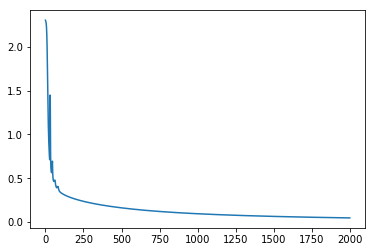

In [20]:
plt.plot(costs)

In [21]:
#training
df = pd.read_csv('mnist_test.csv',header = None)
data = np.array(df)
X_test = (data[:,1:].transpose())/255
Y_test = data[:,0:1].transpose()
accuracy = 0
m_test = X_test.shape[1]
predict = np.zeros((1,m_test))
A_test,cache = forward_prop(X_test,parameters)
for i in range(m_test):
    max = 0
    for j in range(10):
        if A_test[j,i] > max:
            max = A_test[j,i]
            max_index = j
        predict[0,i] = max_index
    if predict[0,i] == Y_test[0,i]:
        accuracy = accuracy + 1
accuracy = (accuracy/m_test)*100
print(accuracy,"%")
index = 0

97.63 %


Its a 5


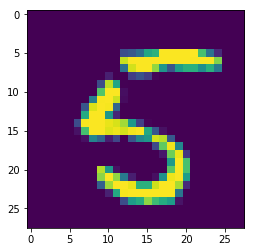

In [22]:
#change index toview different examples
index = 897
print("Its a",int(predict[0,index]))
plt.imshow(X_test[:,index].reshape(28,28))